# Parameter Estimation with Missing Value
## Concept
+ In a binary classification problem, a situation contains missing values in inputs are often occur, and validation of whether estimate the parameter of the model and the missing values accurately is important issue.
+ In this notebook, we examine a test case that the $M$-th input feature is partialy missing.

## Notation
+ $n$: the number of training data
+ $M$: dimension of input feature
+ $x$: input $\in \mathbb{R}^M$
+ $y$: output $\in \{0,1\}$
+ $(x^n, y^n)$: the pair of the training input and output data
+ $w$: weight parameter to be estimated
+ $x^*$: the test input
+ $y^*$: the test output
+ $\lambda_1$: hyperparameter for regularization of $w$
+ $\lambda_2$: hyperparameter for regularization of the missing values
+ $n_1$: the number of the inputs that is not missing.
+ $n_2$: the number of the inputs that is missing.
+ $x_M^{n_2}$: the missing value of the training data
+ $x_M^{n_1}$: $M$-th feature of the input that is not missing
+ $\tilde{x} := (x_1, \ldots, x_{M-1})$

## Model
+ In this notebook, we particularly consider about logisitic regression case:
+ Objective function: 
$$
L(w,x_M^{n_2}) = \sum_{i=1}^{n_1} \Bigl\{ (y_i - 0.5) x_i \cdot w - \log 2 \cosh(x_i \cdot w / 2) \Bigr\} +   
\sum_{i=n_1 + 1}^{n} \Bigl\{ (y_i - 0.5) (\tilde{x}_i \cdot \tilde{w} + x_{i,M} w_{M}) - \log 2 \cosh(x_i \cdot w / 2) \Bigr\} - 
\lambda_1 \|w\|^2 - \lambda_2 \sum_{i=n_1+1}^n \|x_{i,M}\|^2
$$
+ Note that we search a maximum likelihood estimation here, but we can extend it to approximate posterior distribution, that is variational Bayesian methodology by asuuming independency between $w$ and $x_M^{n_2}$.

## Comparison
+ To validate the above formalization, we compare it with the following another method:
    1. Predict by $(y^{n_1}, x^{n_1})$
    2. Predict by $(y^n, \tilde{x}^n)$

# Problme setting

## library import

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

In [3]:
data_seed = 20191228
n = 400
N = 400
M = 4
X_domain = (-5, 5)

n1 = 200
n1_ind = np.arange(n1)
n2 = n - n1
n2_ind = np.arange(start = n1, stop = n)

In [4]:
np.random.seed(data_seed)

In [5]:
true_w = np.random.normal(size = M)
base_X = np.random.uniform(low = X_domain[0], high = X_domain[1], size = n)
train_X = np.array([base_X**j for j in range(M)]).T
train_prob = expit(train_X @ true_w)
train_Y = np.random.binomial(n = 1, p = train_prob, size = n)

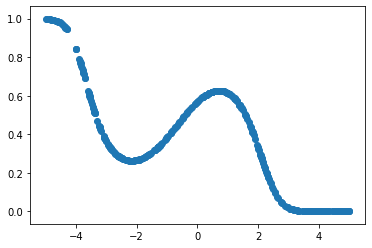

In [6]:
plt.scatter(train_X[:,1], train_prob)
plt.show()

# Learning
+ At first, train without missing value.

In [7]:
learning_seed = 20191229
iteration = 100
l1 = 1

In [11]:
np.random.seed(learning_seed)
est_w = np.random.normal(size = M)

In [12]:
for ite in range(iteration):
    dw = (train_Y - 0.5) @ train_X - np.tanh(train_X @ est_w/2) @ train_X/2 - l1 * est_w
    break

In [14]:
est_w

array([-0.34006367,  0.1885226 ,  0.46197246,  0.00196691])

In [15]:
true_w

array([ 0.2806828 ,  0.59928418, -0.28747788, -0.13122198])

In [13]:
dw

array([ -183.20768246,  -259.79344697, -2043.9154487 , -5248.12512302])